In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

##  1 Return Analysis (25pts)
1. (a) (5pts) For each of the 10assets, report the following annualized excess return statistics:
• mean
• volatility
• Sharpe ratio

In [3]:
assets = pd.read_excel(
    './midterm_A_data-1.xlsx',
    sheet_name='assets (excess)',  # Specify the sheet name
    index_col=0,  # Set the index to the first column in the excel sheet
    parse_dates=[
        0
    ],  # Parse the dates from the first column to turn them into datetime objects
)

In [4]:
mean_vol_table = assets.describe().loc[['mean','std']].transpose()
mean_vol_table['Annualized_Mean'], mean_vol_table['Annualized_Std'] = mean_vol_table['mean'] * 12, mean_vol_table['std'] * (12**0.5)
mean_vol_table[['Annualized_Mean','Annualized_Std']].style.format('{:,.2%}')
mean_vol_table['Annualized_Sharpe_Ratio'] = mean_vol_table['Annualized_Mean']/mean_vol_table['Annualized_Std']
mean_vol_table_print = mean_vol_table.sort_values('Annualized_Sharpe_Ratio', ascending = False)


mean_vol_table_print[['Annualized_Mean','Annualized_Std', 'Annualized_Sharpe_Ratio']].style.format("{:.2}")

,Annualized_Mean,Annualized_Std,Annualized_Sharpe_Ratio
NoDur,0.087,0.12,0.69
Utils,0.092,0.15,0.63
Hlth,0.079,0.14,0.55
Shops,0.083,0.16,0.53
Manuf,0.087,0.17,0.5
Enrgy,0.1,0.25,0.41
Durbl,0.11,0.3,0.36
Other,0.066,0.18,0.36
HiTec,0.072,0.24,0.3
Telcm,0.023,0.18,0.13


  (b) (2pts) Which asset has the
• highest mean return?
• highest Sharpe ratio?


In [24]:
print('Best Sharpe Ratio: '+ str(round(mean_vol_table_print.iloc[[0]].Annualized_Sharpe_Ratio[0], 2)) + ' for ' + mean_vol_table_print.iloc[[0]].index)
print('Best Sharpe Ratio: '+ str(round(mean_vol_table_print.iloc[[-1]].Annualized_Sharpe_Ratio[0], 2)) + ' for ' + mean_vol_table_print.iloc[[-1]].index)


Index(['Best Sharpe Ratio: 0.69 for NoDur'], dtype='object')
Index(['Best Sharpe Ratio: 0.13 for Telcm'], dtype='object')


2. (5pts) For each of the 10assets, report the following statistics (no annualization needed).

• VaR (0.05). That is to say, the 5th quantile of returns.

• CVaR (0.05). That is to say, the average of the returns less than the 5th quantile.

• maximum drawdown1 Though we usually calculate maximum drawdown on total returns,
keep things simple and just continue to use the excess returns we’re already using in all
the other problems.

In [29]:
vars = {}
vars["VaR (0.05)"] = assets.quantile(0.05, axis=0)
vars["CVaR (0.05)"] = assets[assets <= assets.quantile(0.05, axis=0)].mean()

# Cumulative returns on $1000
wealth_index = 1000 * (1 + assets).cumprod()
previous_peaks = wealth_index.cummax()
# Biggest difference between cumulative max and your current wealth
drawdowns = (wealth_index - previous_peaks) / previous_peaks
vars["Max Drawdown"] = drawdowns.min()

summary = pd.DataFrame(vars)

summary.style.format("{:.2}")


,VaR (0.05),CVaR (0.05),Max Drawdown
NoDur,-0.057,-0.08,-0.35
Durbl,-0.12,-0.16,-0.77
Manuf,-0.085,-0.12,-0.55
Enrgy,-0.11,-0.15,-0.66
HiTec,-0.12,-0.16,-0.81
Telcm,-0.095,-0.12,-0.77
Shops,-0.075,-0.097,-0.41
Hlth,-0.072,-0.088,-0.43
Utils,-0.065,-0.097,-0.39
Other,-0.084,-0.13,-0.7


3. (5pts) Which pair of assets has the highest correlation? And the smallest correlation?

Pair of assets with highest correlation: ('Manuf', 'Other')
Pair of assets with lowest correlation: ('Utils', 'HiTec')
NoDur    0.692800
Utils    0.630286
Hlth     0.552768
Shops    0.527238
Manuf    0.501601
Enrgy    0.405560
Durbl    0.356946
Other    0.355806
HiTec    0.304457
Telcm    0.129119
Name: Annualized_Sharpe_Ratio, dtype: float64


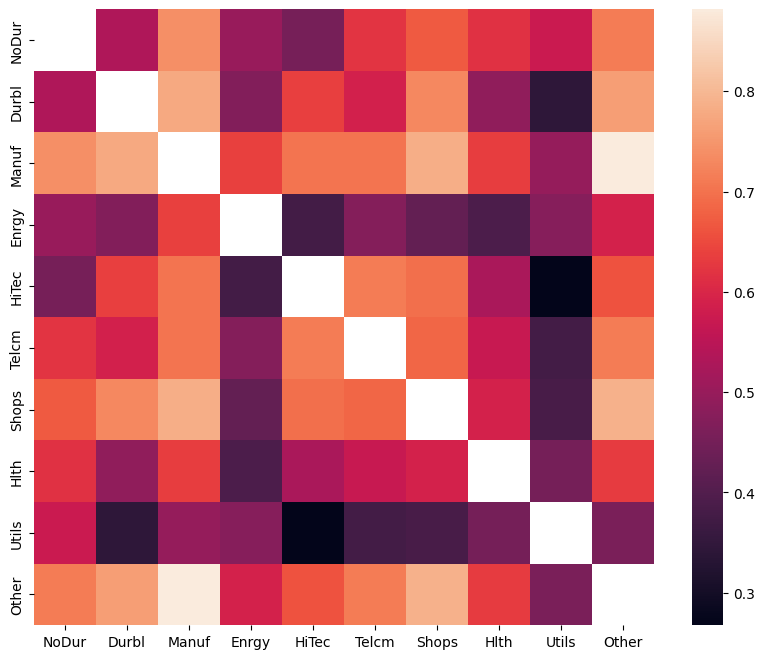

In [31]:
corrmat = assets.corr()
corrmat[corrmat==1] = None
corr_rank = abs(corrmat.unstack()).sort_values(ascending = False).dropna()
print('Pair of assets with highest correlation: ' + str(corr_rank.index[1]))
print('Pair of assets with lowest correlation: ' + str(corr_rank.index[-1]))
print(mean_vol_table_print['Annualized_Sharpe_Ratio'])
# print(mean_vol_table_print['Annualized_Sharpe_Ratio'].describe().loc[['mean']])
plt.figure(figsize=(10,8))
sns.heatmap(corrmat)
plt.show()